In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
DF1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/양파.xlsx', thousands=',')

## 데이터 전처리

In [3]:
DF1['도매가격(원/kg)'] = DF1['도매가격(원/kg)'].replace('-',0)
DF1['도매가격(원/kg)'] = DF1['도매가격(원/kg)'].astype(float)
DF1

,일자,품목,품종,시장,법인,광역산지,시군산지,도매가격(원/kg),거래량(톤),거래금액(백만원)
0,2021-10-07,양파,양파(일반),대구북부도매,효성청과,경남,창녕,751.427317,22.77,17.11
1,2021-10-07,양파,양파(일반),대구북부도매,효성청과,경남,합천,714.854269,18.49,13.22
2,2021-10-07,양파,양파(일반),대구북부도매,효성청과,경북,고령,696.811539,10.54,7.34
3,2021-10-07,양파,양파(일반),대구북부도매,효성청과,경북,영천,792.929293,7.92,6.28
4,2021-10-07,양파,양파(일반),대구북부도매,대구중앙청과,대구,달성,584.558824,2.72,1.59
...,...,...,...,...,...,...,...,...,...,...
247167,2014-01-03,양파,저장양파,서울가락도매,한국청과,경북,경산,786.583333,12.00,9.44
247168,2014-01-03,양파,저장양파,서울가락도매,동화청과,경남,창녕,665.000000,11.80,7.85
247169,2014-01-03,양파,자주양파,서울가락도매,한국청과,전남,무안,1209.448819,1.52,1.84
247170,2014-01-03,양파,자주양파,서울가락도매,중앙청과,전남,무안,1225.000000,0.77,0.94


## 데이터 이상치 탐색

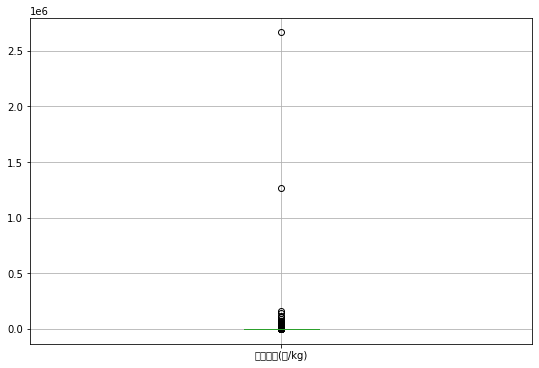

In [4]:
plt.figure(figsize = (9,6))
boxplot = DF1.boxplot(column = ['도매가격(원/kg)'])
plt.show()

## 이상치 처리

In [5]:

quartile_1 = DF1['도매가격(원/kg)'].quantile(0.25)
quartile_3 = DF1['도매가격(원/kg)'].quantile(0.75)
IQR = quartile_3 - quartile_1
search_df = DF1[(DF1['도매가격(원/kg)'] < (quartile_1 - 5 * IQR)) | (DF1['도매가격(원/kg)'] > (quartile_3 + 5 * IQR))]
print(search_df)

               일자  품목      품종      시장  ...  시군산지    도매가격(원/kg) 거래량(톤)  거래금액(백만원)
787    2021-10-01  양파  양파(일반)    진주도매  ...    진주  1.600000e+04  0.001       0.02
1467   2021-09-18  양파      기타    천안도매  ...  서울중구  3.750000e+03  0.020       0.08
3376   2021-09-03  양파      기타    포항도매  ...    영천  1.000000e+04  0.090       0.90
4581   2021-08-24  양파    자주양파    포항도매  ...    영천  1.375000e+04  0.008       0.11
5306   2021-08-18  양파    저장양파  서울강서도매  ...    함양  2.664769e+06  0.005      13.32
...           ...  ..     ...     ...  ...   ...           ...    ...        ...
210997 2017-02-01  양파      기타    구리도매  ...    구리  3.389300e+03  0.050       0.17
222416 2016-04-02  양파     깐양파    안산도매  ...    서산  3.400000e+03  0.010       0.03
245249 2014-04-09  양파    자주양파  서울가락도매  ...    무안  4.041667e+03  0.070       0.29
245449 2014-04-03  양파    자주양파  서울가락도매  ...    무안  3.631579e+03  0.680       2.48
245487 2014-04-02  양파    자주양파  서울가락도매  ...    함양  3.892535e+03  0.580       2.24

[519 rows x 10 columns]


In [6]:
DF1 = DF1.drop(search_df.index, axis = 0)
print(DF1)

               일자  품목      품종      시장  ... 시군산지   도매가격(원/kg) 거래량(톤)  거래금액(백만원)
0      2021-10-07  양파  양파(일반)  대구북부도매  ...   창녕   751.427317  22.77      17.11
1      2021-10-07  양파  양파(일반)  대구북부도매  ...   합천   714.854269  18.49      13.22
2      2021-10-07  양파  양파(일반)  대구북부도매  ...   고령   696.811539  10.54       7.34
3      2021-10-07  양파  양파(일반)  대구북부도매  ...   영천   792.929293   7.92       6.28
4      2021-10-07  양파  양파(일반)  대구북부도매  ...   달성   584.558824   2.72       1.59
...           ...  ..     ...     ...  ...  ...          ...    ...        ...
247167 2014-01-03  양파    저장양파  서울가락도매  ...   경산   786.583333  12.00       9.44
247168 2014-01-03  양파    저장양파  서울가락도매  ...   창녕   665.000000  11.80       7.85
247169 2014-01-03  양파    자주양파  서울가락도매  ...   무안  1209.448819   1.52       1.84
247170 2014-01-03  양파    자주양파  서울가락도매  ...   무안  1225.000000   0.77       0.94
247171 2014-01-03  양파    자주양파  서울가락도매  ...   문경  1480.000000   0.50       0.74

[246653 rows x 10 columns]


## 도매가격으로 데이터 그룹화

In [7]:
# row마다 거래량이 다르기 때문에 단순히 일자별로 groupby해서 도매가격 평균 내면 실제 하루 평균 도매가격과 다르다.
# DF2 = DF1.groupby('일자').mean()
# 하루 거래금액 합계를 하루 거래량 합계로 나누면 하루 평균 도매가격이다.
DF2 = DF1.groupby('일자').sum()
DF2['도매가격']=(DF2['거래금액(백만원)']*1000)/DF2['거래량(톤)']

DF2.drop(columns=['도매가격(원/kg)'], inplace=True)

In [8]:
DF2.head()

,거래량(톤),거래금액(백만원),도매가격
일자,,,
2014-01-03,991.01,725.48,732.061230
2014-01-04,533.11,399.97,750.257921
2014-01-06,981.93,699.03,711.893923
2014-01-07,662.89,481.38,726.183831
2014-01-08,649.53,451.31,694.825489


## 이상치 탐지

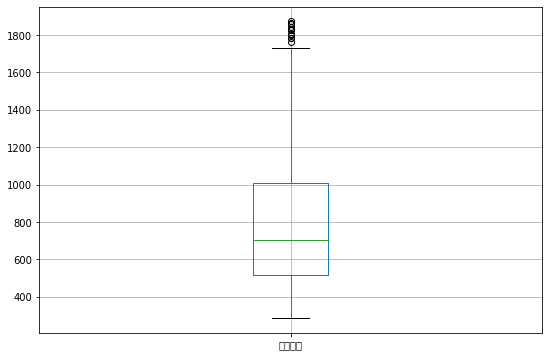

In [9]:

plt.figure(figsize = (9,6))
boxplot = DF2.boxplot(column = ['도매가격'])
plt.show()

## train_data, test_data 분리

In [10]:
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(DF2, test_size = 0.3, shuffle = False)

## Autocorrelation, Partial Autocorrelation 시각화
 - 전형적인 비정상적 시계 열 데이터

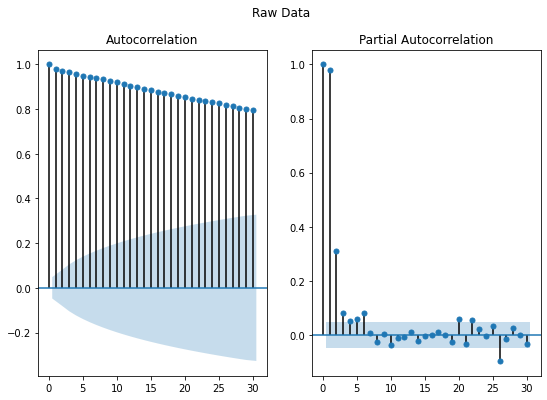

In [11]:
import statsmodels.api as sm
fig, ax = plt.subplots(1,2, figsize = (9,6))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data['도매가격'].values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(train_data['도매가격'].values.squeeze(), lags = 30, ax = ax[1]);

## 정상적 데이터를 위한 차분

In [12]:
#비정상적인 데이터를 차분으로 정상적인 데이터를 만들어야 한다.
# 차분은 현시점의 데이터에서 전 시점의 데이터를 뺀값이다.
diff_train_data = train_data.copy()
diff_train_data = diff_train_data.diff()
#차분을 하게되면 맨앞과 맨뒤에 결치가 생겨 결측치를 제거하는 과정이 필요하다.
diff_train_data = diff_train_data.dropna()
print(train_data)
print('*****************************')
print(diff_train_data)

              거래량(톤)  거래금액(백만원)        도매가격
일자                                         
2014-01-03   991.010    725.480  732.061230
2014-01-04   533.110    399.970  750.257921
2014-01-06   981.930    699.030  711.893923
2014-01-07   662.890    481.380  726.183831
2014-01-08   649.530    451.310  694.825489
...              ...        ...         ...
2019-06-03  4425.083   2058.548  465.199862
2019-06-04  3701.170   1697.446  458.624165
2019-06-05  4049.950   1760.751  434.758701
2019-06-06  4098.770   1662.650  405.646084
2019-06-07  2983.208   1194.599  400.441069

[1678 rows x 3 columns]
*****************************
              거래량(톤)  거래금액(백만원)       도매가격
일자                                        
2014-01-04  -457.900   -325.510  18.196690
2014-01-06   448.820    299.060 -38.363997
2014-01-07  -319.040   -217.650  14.289908
2014-01-08   -13.360    -30.070 -31.358342
2014-01-09   -55.910    -56.410 -29.585100
...              ...        ...        ...
2019-06-03  1965.373    835.4

## 차분 전 RAW 데이터와 차분 후 Diff 데이터

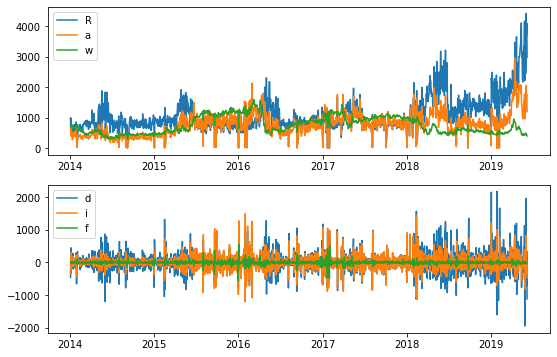

In [13]:
plt.figure(figsize = (9,6))
plt.subplot(211)
plt.plot(train_data)
plt.legend('Raw Data')
plt.subplot(212)
plt.plot(diff_train_data)
plt.legend('diff Data')
plt.show()

## 차분후 P값

In [14]:
# ADF 검정 시계열 데이터의 정상성을 확인

from statsmodels.tsa.stattools import adfuller
result = adfuller(diff_train_data['도매가격'])
print('ADF Statistic : %f' %result[0])
print('p-value : %f' %result[1])

ADF Statistic : -22.906194
p-value : 0.000000


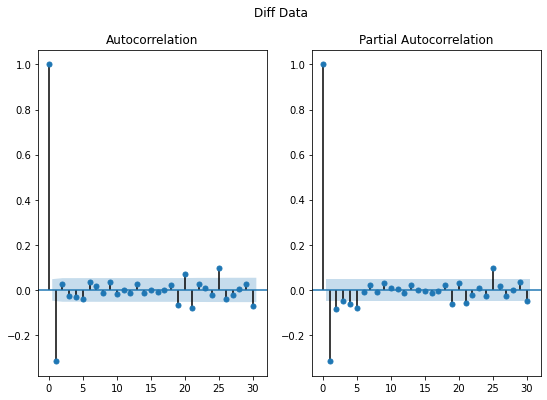

In [15]:
fig, ax = plt.subplots(1,2, figsize = (9,6))
fig.suptitle('Diff Data')
sm.graphics.tsa.plot_acf(diff_train_data['도매가격'].values.squeeze(), lags = 30, ax = ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data['도매가격'].values.squeeze(), lags = 30, ax = ax[1]);

## 임의로 ARIMA 모델의 하이퍼 파라미터 설정

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = ARIMA(train_data['도매가격'].values, order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1677
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -9035.675
Method:                       css-mle   S.D. of innovations             52.933
Date:                Thu, 14 Oct 2021   AIC                          18077.350
Time:                        00:31:34   BIC                          18093.624
Sample:                             1   HQIC                         18083.379
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1997      0.983     -0.203      0.839      -2.127       1.727
ar.L1.D.y     -0.3148      0.023    -13.589      0.000      -0.360      -0.269
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1762           +0.0000j            3.1762            0.5000
-----------------------------------------------------------------------------
"""

## ARIMA 모델 설계
 - 최적의 파라미터 찾기

In [17]:
import itertools
p = range(0,3)
d = range(1,2)
q = range(0,2)
pdq = list(itertools.product(p,d,q))

aic = []
params = []
for i in pdq:
    try:
        model = ARIMA(train_data['도매가격'].values, order=(i))
        model_fit = model.fit()
        print(f'ARIMA : {i} >> AIC : {round(model_fit.aic,2)}')
        aic.append(round(model_fit.aic,2))
        params.append((i))
    except:
        continue
 


ARIMA : (0, 1, 0) >> AIC : 18250.51
ARIMA : (0, 1, 1) >> AIC : 18059.21
ARIMA : (1, 1, 0) >> AIC : 18077.35
ARIMA : (1, 1, 1) >> AIC : 18060.82
ARIMA : (2, 1, 0) >> AIC : 18067.76
ARIMA : (2, 1, 1) >> AIC : 18056.15


### 최적의 파라미터로 ARIMA 모델 설계

In [18]:
model_opt = ARIMA(train_data['도매가격'].values, order=(2,1,1))
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1677
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9023.076
Method:                       css-mle   S.D. of innovations             52.536
Date:                Thu, 14 Oct 2021   AIC                          18056.152
Time:                        00:31:48   BIC                          18083.276
Sample:                             1   HQIC                         18066.200
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1881      0.743     -0.253      0.800      -1.644       1.268
ar.L1.D.y      0.3283      0.091      3.611      0.000       0.150       0.506
ar.L2.D.y      0.1215      0.044      2.788      0.005       0.036       0.207
ma.L1.D.y     -0.6816      0.086     -7.935      0.000      -0.850      -0.513
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8203           +0.0000j            1.8203            0.0000
AR.2           -4.5230           +0.0000j            4.5230            0.5000
MA.1            1.4671           +0.0000j            1.4671            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
from sklearn.metrics import r2_score
prediction = model_opt_fit.forecast(len(test_data['도매가격']))
prediction_value = prediction[0]
predicted_ub = prediction[2][:,0]
predicted_lb = prediction[2][:,1]
predict_index = list(test_data['도매가격'].index)
r2 = r2_score(test_data['도매가격'], prediction_value)

## ARIMA 모형 예측 결과

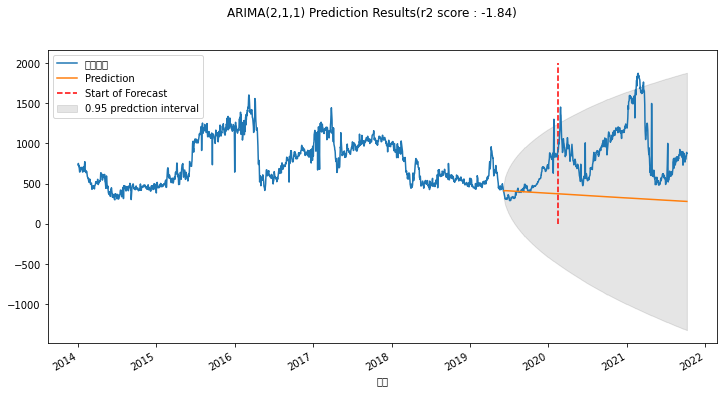

In [20]:
fig, ax = plt.subplots(figsize = (12,6))
DF2['도매가격'].plot(ax = ax)
ax.vlines('2020-2-17', 0,2000,linestyle = '--', color = 'r', label = 'Start of Forecast');
ax.plot(predict_index, prediction_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 predction interval')
ax.legend(loc = 'upper left')
plt.suptitle(f'ARIMA(2,1,1) Prediction Results(r2 score : {round(r2,2)})')
plt.show()

## 모형 예측 함수 설정

In [21]:
from sklearn import metrics


def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    corr = round(np.corrcoef(y_true, y_pred)[0,1],3)
    mape = round(metrics.mean_absolute_error(y_true, y_pred)*100,3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared = False),3)

    df = pd.DataFrame({
        'R2': r2,
        "Corr": corr,
        'RMSE': rmse,
        'MAPE': mape
    }, index = [0])

    return df

In [22]:
scoring(np.array(test_data['도매가격']), np.array(prediction_value))

,R2,Corr,RMSE,MAPE
0,-183.874,-0.463,612.485,48925.055


## SARIMA 모형
 - SARIMA 모형의 최적화 된 하이퍼 파라미터 설정

In [23]:
%%time

import itertools
p = range(0,3)
d = range(1,2)
q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

aic = []
params = []
for i in pdq:
    for j in seasonal_pdq:
        try:
            model = SARIMAX(train_data['도매가격'].values, exog =train_data['거래량(톤)'].values ,order = (i), seasonal_order=(j))
            model_fit = model.fit()
            print(f'SARIMA : {i}{j} >> AIC : {round(model_fit.aic,2)}')
            aic.append(round(model_fit.aic,2))
            params.append((i,j))
        except:
            continue


SARIMA : (0, 1, 0)(0, 1, 0, 12) >> AIC : 19307.06
SARIMA : (0, 1, 0)(0, 1, 1, 12) >> AIC : 18183.61
SARIMA : (0, 1, 0)(1, 1, 0, 12) >> AIC : 18842.01
SARIMA : (0, 1, 0)(1, 1, 1, 12) >> AIC : 18185.35
SARIMA : (0, 1, 0)(2, 1, 0, 12) >> AIC : 18664.12
SARIMA : (0, 1, 0)(2, 1, 1, 12) >> AIC : 18186.51
SARIMA : (0, 1, 1)(0, 1, 0, 12) >> AIC : 19108.97
SARIMA : (0, 1, 1)(0, 1, 1, 12) >> AIC : 17993.0
SARIMA : (0, 1, 1)(1, 1, 0, 12) >> AIC : 18607.05
SARIMA : (0, 1, 1)(1, 1, 1, 12) >> AIC : 17994.88
SARIMA : (0, 1, 1)(2, 1, 0, 12) >> AIC : 18447.72
SARIMA : (0, 1, 1)(2, 1, 1, 12) >> AIC : 17996.57
SARIMA : (1, 1, 0)(0, 1, 0, 12) >> AIC : 19124.44
SARIMA : (1, 1, 0)(0, 1, 1, 12) >> AIC : 18010.78
SARIMA : (1, 1, 0)(1, 1, 0, 12) >> AIC : 18627.19
SARIMA : (1, 1, 0)(1, 1, 1, 12) >> AIC : 18012.7
SARIMA : (1, 1, 0)(2, 1, 0, 12) >> AIC : 18465.66
SARIMA : (1, 1, 0)(2, 1, 1, 12) >> AIC : 18014.5
SARIMA : (1, 1, 1)(0, 1, 0, 12) >> AIC : 19110.84
SARIMA : (1, 1, 1)(0, 1, 1, 12) >> AIC : 17994.71
SAR

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA : (1, 1, 1)(2, 1, 1, 12) >> AIC : 17998.33
SARIMA : (2, 1, 0)(0, 1, 0, 12) >> AIC : 19117.53
SARIMA : (2, 1, 0)(0, 1, 1, 12) >> AIC : 18001.26
SARIMA : (2, 1, 0)(1, 1, 0, 12) >> AIC : 18612.01
SARIMA : (2, 1, 0)(1, 1, 1, 12) >> AIC : 18003.13
SARIMA : (2, 1, 0)(2, 1, 0, 12) >> AIC : 18453.31
SARIMA : (2, 1, 0)(2, 1, 1, 12) >> AIC : 18004.71
SARIMA : (2, 1, 1)(0, 1, 0, 12) >> AIC : 19025.14
SARIMA : (2, 1, 1)(0, 1, 1, 12) >> AIC : 17990.22


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA : (2, 1, 1)(1, 1, 0, 12) >> AIC : 18572.21
SARIMA : (2, 1, 1)(1, 1, 1, 12) >> AIC : 18015.28
SARIMA : (2, 1, 1)(2, 1, 0, 12) >> AIC : 18446.61


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA : (2, 1, 1)(2, 1, 1, 12) >> AIC : 18012.44
CPU times: user 12min 38s, sys: 9min, total: 21min 38s
Wall time: 11min 23s


In [24]:
optimal = [(params[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[(((2, 1, 1), (0, 1, 1, 12)), 17990.22)]

In [25]:
model_opt = SARIMAX(train_data['도매가격'].values, order = optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1678
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -8989.474
Date:                            Thu, 14 Oct 2021   AIC                          17988.948
Time:                                    00:44:25   BIC                          18016.036
Sample:                                         0   HQIC                         17998.987
                                           - 1678                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3260      0.082      3.998      0.000       0.166       0.486
ar.L2          0.1220      0.036      3.404      0.001       0.052       0.192
ma.L1         -0.6794      0.081     -8.346      0.000      -0.839      -0.520
ma.S.L12      -0.9996      0.488     -2.046      0.041      -1.957      -0.042
sigma2      2765.6136   1340.544      2.063      0.039     138.195    5393.032
===================================================================================
Ljung-Box (Q):                       62.45   Jarque-Bera (JB):             31168.93
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
prediction = model_opt_fit.get_forecast(len(test_data['도매가격']))
predicted_value = prediction.predicted_mean
predicted_ub = prediction.conf_int()[:,0]
predicted_lb = prediction.conf_int()[:,1]
predict_index = list(test_data.index)
r2 = r2_score(test_data['도매가격'], predicted_value)

## SARIMA 모형 예측 결과

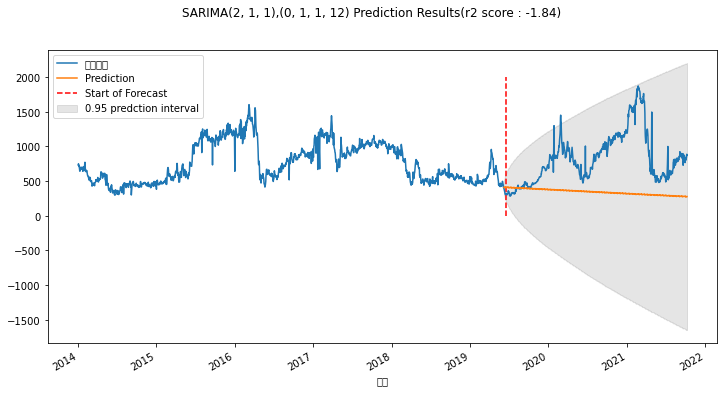

In [37]:
fig, ax = plt.subplots(figsize = (12,6))
DF2['도매가격'].plot(ax = ax)
ax.vlines('2019-6-17', 0,2000,linestyle = '--', color = 'r', label = 'Start of Forecast');
ax.plot(predict_index, predicted_value, label = 'Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 predction interval')
ax.legend(loc = 'upper left')
plt.suptitle(f'SARIMA{optimal[0][0][0]},{optimal[0][0][1]} Prediction Results(r2 score : {round(r2,2)})')
plt.show()

In [36]:
scoring(np.array(test_data['도매가격']), np.array(predicted_value))

,R2,Corr,RMSE,MAPE
0,-184.19,-0.462,612.827,48962.413
